In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.patches as mpatches

In [2]:
measured = pd.read_csv(r"./data/train_dm300_full.csv")
predicted = pd.read_csv(r"./data/predictions/train_dm300_backprediction.csv")
smiles_test = pd.read_csv(r"./data/predictions/smiles_test_backprediction.csv")
removal = pd.read_csv(r"./data/predictions/_temp.csv")


frame = {"solvent_name":measured.solvent_name, 'measured': measured.dm300, 'predicted': predicted.dm300, 'removal': removal.dm300}

data = pd.DataFrame(frame)

In [3]:
data.head()

,solvent_name,measured,predicted,removal
0,Methanol,0.6452,0.878871,0.259389
1,Methanol,0.8522,0.696528,0.502861
2,Methanol,0.3576,0.886862,0.311448
3,Methanol,0.6643,0.433586,0.476340
4,Methanol,0.1865,0.155642,0.217609


In [4]:

def rejection_diagram(x: str, y: str, data: pd.DataFrame, x_axis: str, y_axis: str, group="solvent_name"):
    """
    :x: measured data
    :y: predicted data
    :data: pandas dataframe
    :x_axis: Label name on the X-axis
    :y_axis: Label name on the Y-axis
    """
    plt.figure(figsize=(10,8), tight_layout=True)
    ax = plt.axes()
    ax.set(facecolor = "white")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    _data = data.dropna(subset=[x])
    x_values=_data[x].astype('float64')
    y_values=_data[y].astype('float64')
    
    # Get unique names of species
    uniq = list(set(_data[group]))

    # Set the color map to match the number of species
    z = range(1,len(uniq))
    hot = plt.get_cmap('tab20')
    cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

    markers = ["o", "v", "^", "<", ">", "1", "2",
                "3", "4", "8", "s", "p", "P", "*",
                "h", "H", "+", "x", "X", "D", "d"]

    for enum, (k, i) in enumerate(zip(uniq, markers)):
        indx = _data[group] == k
        plt.scatter(x_values[indx], y_values[indx], s=50, color=scalarMap.to_rgba(enum), label=k, marker=i)

    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    # plt.ylim(-1,3)

    z = np.polyfit(_data[x], _data[y], 1)
    p = np.poly1d(z)
    y_hat = np.poly1d(z)(_data[x])

    r_square = r2_score(_data[y], y_hat)
    plt.plot(_data[x],p(_data[x]),"-")
    
    
    text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(_data[y],y_hat):0.3f}$"
    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=10, verticalalignment='center', horizontalalignment='left')

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

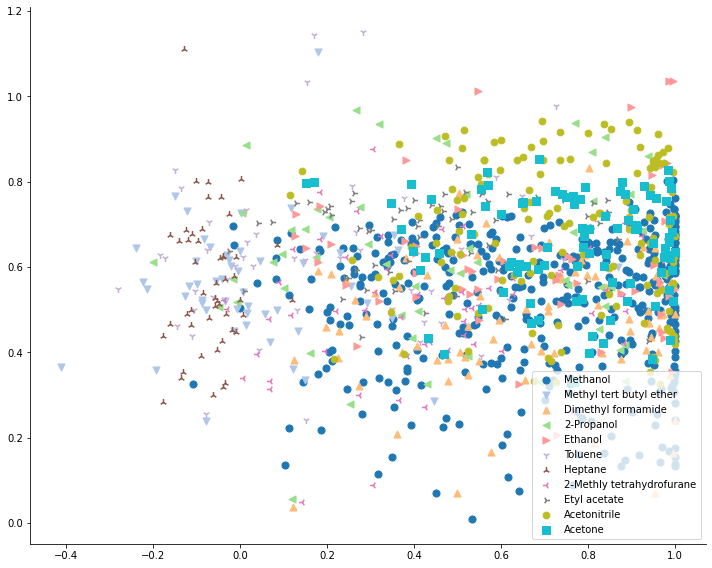

In [5]:
mwco_curve = rejection_diagram(x="measured", y="removal", data=data, x_axis="Measured", y_axis="Predicted")

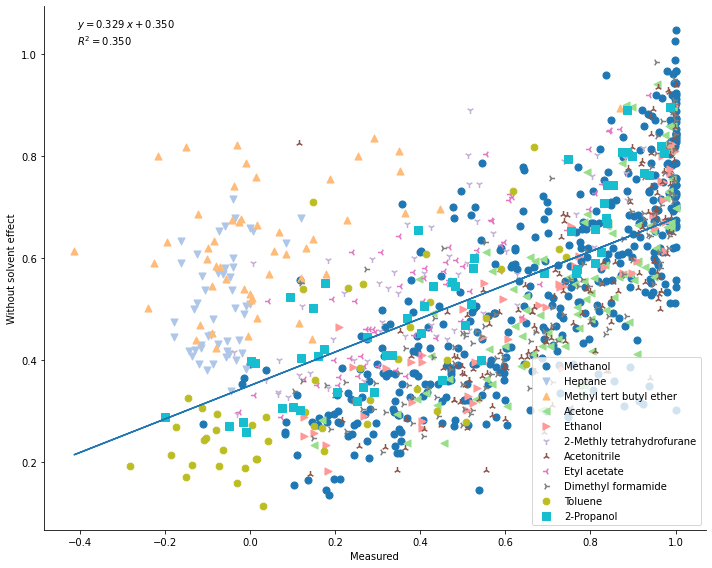

In [66]:
mwco_curve = rejection_diagram(x="measured", y="smiles_test", data=data, x_axis="Measured", y_axis="Without solvent effect")


In [6]:
for enum, i in enumerate(main.dm300_measured):
    if i == "Methanol":
        print(enum)

203
